Automatically created module for IPython interactive environment


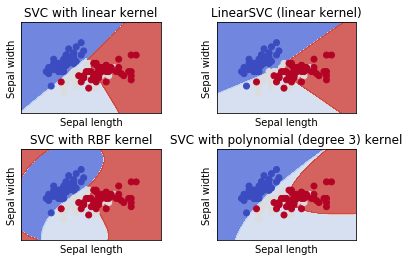

In [4]:
print(__doc__)

# 加载包
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# 加载数据
iris = datasets.load_iris()
# 特征X保留全部行，只保留前两列，即Sepal length和Sepal width
X = iris.data[:, :2]
# 标签y
y = iris.target

# 训练四个SVM模型
# C为SVM模型的正则化参数
C = 1.0
# 线形核函数
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# RBF核函数
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# 多项式核函数
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
# 线性SVM
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# 绘制图像
# 选择x、y范围，分别为Sepal length范围和Sepal width范围
# 将x、y范围网格化，生成一个二维数组
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 四个绘图标题
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)', 'SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel']

# 分别绘制四个SVM模型的分类结果
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
  # 选择对应的子图
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  # 对网格数据进行预测并绘制相应的区域
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # 将训练集中的记录绘制成散点并根据标签着色
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

# 显示绘图结果
plt.show()